# SEIR Migration model

In [12]:
import pandas as pd
import numpy as np

# Initial populations for each state in each location (A, B, C, D)
# Assuming some initial distribution of populations across SEIR states
initial_population = {
    'A': {'S': 1000, 'E': 50, 'I': 25, 'R': 25},
    'B': {'S': 1200, 'E': 30, 'I': 40, 'R': 30},
    'C': {'S': 1100, 'E': 40, 'I': 30, 'R': 30},
    'D': {'S': 900, 'E': 60, 'I': 20, 'R': 20}
}

# Convert to DataFrame
seir_matrix = pd.DataFrame(initial_population)

# Display the initial SEIR matrix
seir_matrix

# Function to perform the swapping between two locations
def swap_population(matrix, loc1, loc2, num_to_swap):
    for state in matrix.index:
        # Randomly select a number to swap for this state
        swap_number = np.random.randint(0, num_to_swap + 1)

        # Ensure we don't swap more individuals than are present in the smallest population of the state
        swap_number = min(swap_number, matrix.loc[state, loc1], matrix.loc[state, loc2])

        # Perform the swap
        matrix.loc[state, loc1] -= swap_number
        matrix.loc[state, loc2] += swap_number

# Simulate the swaps for 10 days
for day in range(10):
    # Swap between A and B, and C and D
    swap_population(seir_matrix, 'A', 'B', 50)  # Swapping up to 50 individuals
    swap_population(seir_matrix, 'C', 'D', 50)  # Swapping up to 50 individuals

# Display the final SEIR matrix after 10 days
seir_matrix



,A,B,C,D
S,788,1412,793,1207
E,0,80,0,100
I,0,65,0,50
R,0,55,0,50


In [7]:
import matplotlib.pyplot as plt

# Reset the SEIR matrix to initial values for the simulation
seir_matrix = pd.DataFrame(initial_population)

# To store the daily matrices
daily_matrices = [seir_matrix.copy()]

# Simulate the swaps for 10 days and store each day's matrix
for day in range(10):
    swap_population(seir_matrix, 'A', 'B', 50)  # Swapping up to 50 individuals
    swap_population(seir_matrix, 'C', 'D', 50)  # Swapping up to 50 individuals
    daily_matrices.append(seir_matrix.copy())



# Returning the daily matrices as well
daily_matrices


[      A     B     C    D
 S  1000  1200  1100  900
 E    50    30    40   60
 I    25    40    30   20
 R    25    30    30   20,
      A     B     C    D
 S  952  1248  1064  936
 E   30    50    33   67
 I    0    65    28   22
 R   12    43    10   40,
      A     B     C    D
 S  910  1290  1042  958
 E   23    57    10   90
 I    0    65     6   44
 R    0    55     1   49,
      A     B     C    D
 S  900  1300  1024  976
 E    3    77     4   96
 I    0    65     0   50
 R    0    55     0   50,
      A     B     C    D
 S  851  1349  1014  986
 E    0    80     0  100
 I    0    65     0   50
 R    0    55     0   50,
      A     B    C     D
 S  819  1381  995  1005
 E    0    80    0   100
 I    0    65    0    50
 R    0    55    0    50,
      A     B    C     D
 S  810  1390  960  1040
 E    0    80    0   100
 I    0    65    0    50
 R    0    55    0    50,
      A     B    C     D
 S  778  1422  952  1048
 E    0    80    0   100
 I    0    65    0    50
 R    0    55

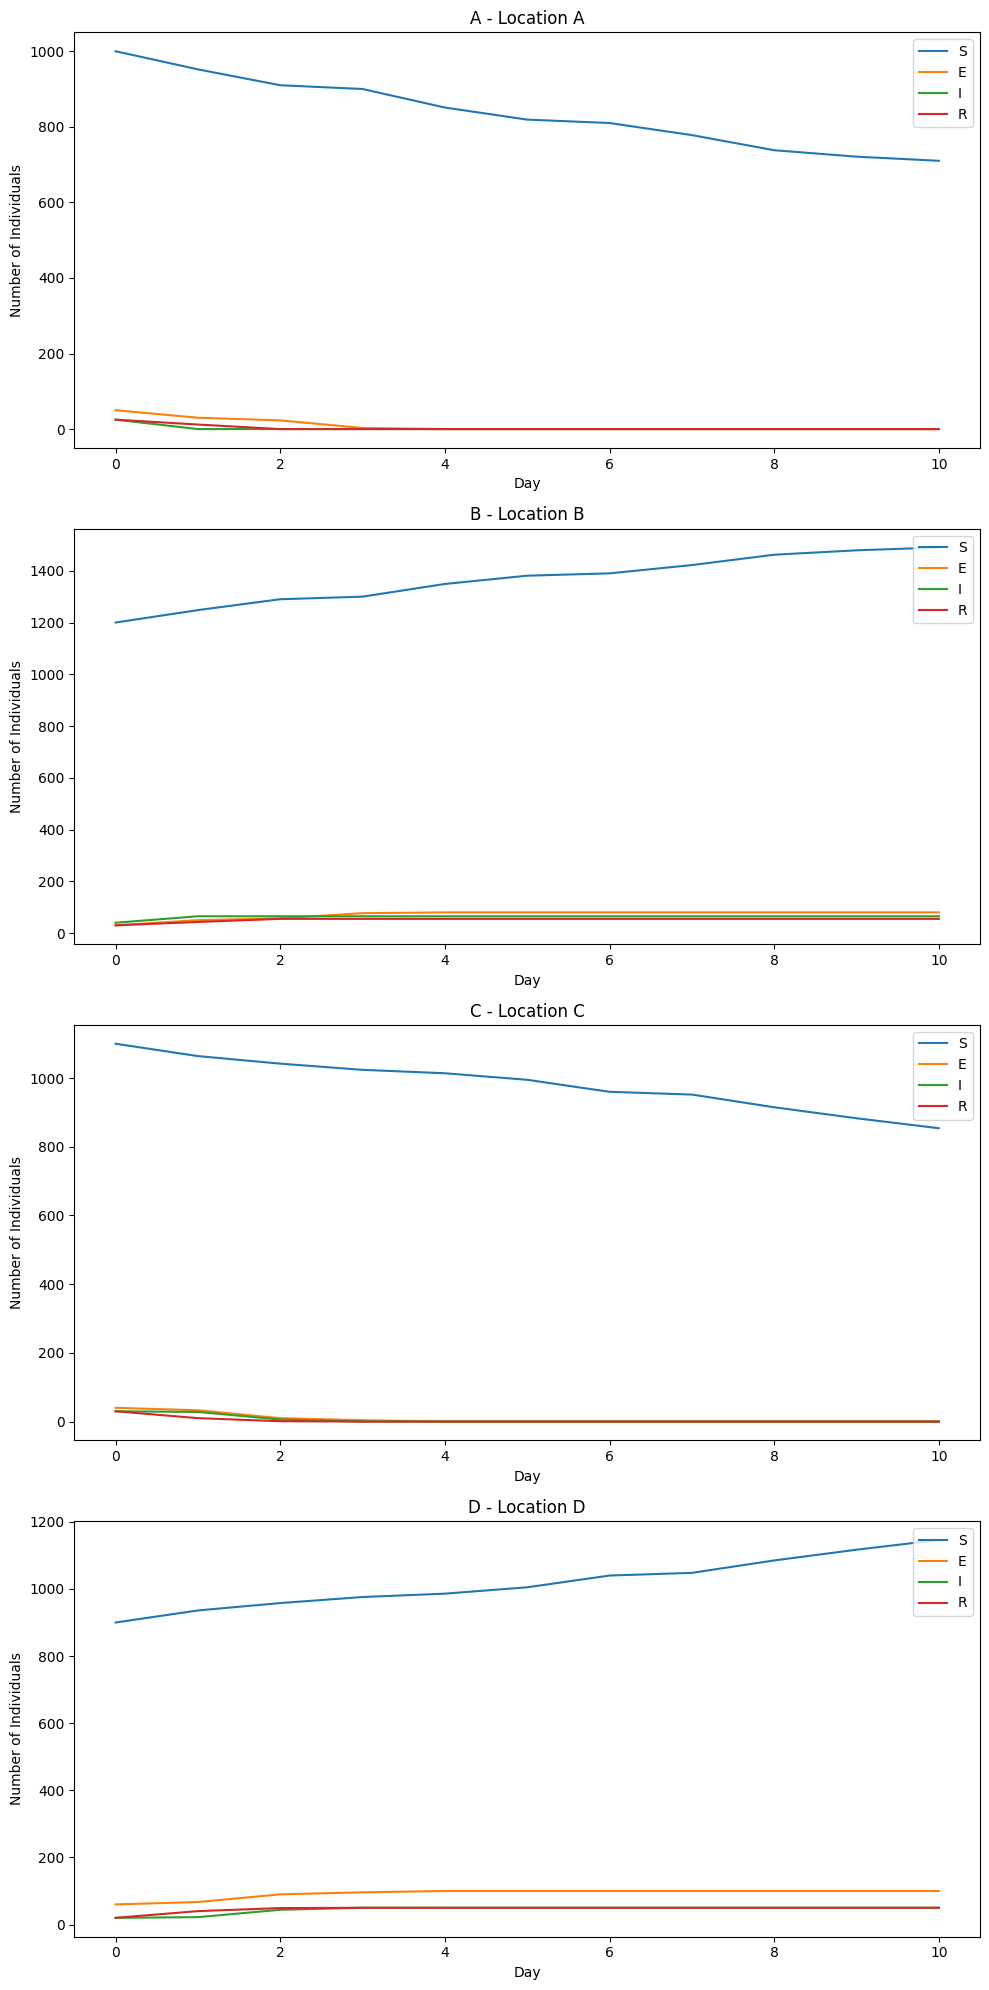

In [8]:
# Plotting the changes over the 10 days for each location
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Titles for each location
locations = ['A - Location A', 'B - Location B', 'C - Location C', 'D - Location D']

# Plot each location in a different subplot
for i, location in enumerate(['A', 'B', 'C', 'D']):
    axs[i].plot([day_matrix[location]['S'] for day_matrix in daily_matrices], label='S')
    axs[i].plot([day_matrix[location]['E'] for day_matrix in daily_matrices], label='E')
    axs[i].plot([day_matrix[location]['I'] for day_matrix in daily_matrices], label='I')
    axs[i].plot([day_matrix[location]['R'] for day_matrix in daily_matrices], label='R')
    axs[i].set_title(locations[i])
    axs[i].set_xlabel('Day')
    axs[i].set_ylabel('Number of Individuals')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


# SEIR 2

In [11]:
import pandas as pd
import numpy as np

# Initial populations for each state in each location (A, B, C, D)
initial_population = {
    'A': {'S': 1000, 'E': 50, 'I': 25, 'R': 25},
    'B': {'S': 1200, 'E': 30, 'I': 40, 'R': 30},
    'C': {'S': 1100, 'E': 40, 'I': 30, 'R': 30},
    'D': {'S': 900, 'E': 60, 'I': 20, 'R': 20}
}

# Convert to DataFrame
seir_matrix = pd.DataFrame(initial_population)

# Function to perform the population exchange
def exchange_population(matrix, day):
    # Define the fixed number of people to exchange
    exchange_number = 100
    
    # Randomly select states for exchange between A-B and C-D
    states = ['S', 'E', 'I', 'R']
    state_A_B = np.random.choice(states)
    state_C_D = np.random.choice(states)

    # Exchange populations between A and B
    min_exchange_A_B = min(matrix.loc[state_A_B, 'A'], exchange_number)
    matrix.loc[state_A_B, 'A'] -= min_exchange_A_B
    matrix.loc[state_A_B, 'B'] += min_exchange_A_B

    # Exchange populations between C and D
    min_exchange_C_D = min(matrix.loc[state_C_D, 'C'], exchange_number)
    matrix.loc[state_C_D, 'C'] -= min_exchange_C_D
    matrix.loc[state_C_D, 'D'] += min_exchange_C_D

    # Record the day and the states involved in the exchange
    matrix['Day'] = day
 

    return matrix

# Create a DataFrame to store the data for all 10 days
all_days_data = []

# Perform the exchanges for 10 days
for day in range(1, 11):
    seir_matrix_day = exchange_population(seir_matrix.copy(), day)
    all_days_data.append(seir_matrix_day)

# Combine the data for all days into a single DataFrame
all_days_df = pd.concat(all_days_data)

# Reset index to have a clear view
all_days_df.reset_index(inplace=True)
all_days_df.rename(columns={'index': 'State'}, inplace=True)

all_days_df.head()  # Display the first 20 rows to show the structure and some data


,State,A,B,C,D,Day
0,S,1000,1200,1100,900,1
1,E,50,30,0,100,1
2,I,25,40,30,20,1
3,R,0,55,30,20,1
4,S,1000,1200,1100,900,2
